# 14

In [53]:
records = [] 

with open("input.txt") as f:
    for line in f:
        line = line.strip().split(' ')

        p_entry = line[0]
        v_entry = line[1]

        p_entry = p_entry.split('=')[1].split(',')
        p_entry = (int(p_entry[0]), int(p_entry[1]))

        v_entry = v_entry.split('=')[1].split(',')
        v_entry = (int(v_entry[0]), int(v_entry[1]))
        
        records.append({"p": p_entry, "v":v_entry})

# Size of the grid
W = 101
H = 103

Make deepcopy se I don't need to reload

In [54]:
from copy import deepcopy

positions = deepcopy(records)

# Do the 100 iterations
for _ in range(100):
    for position in positions: 
        x = (position["p"][0] + position["v"][0]) % W
        y = (position["p"][1] + position["v"][1]) % H

        position["p"] = (x, y)


In [55]:
def count_robots_in_quadrants(positions):
    quadrant_count  = [0,0,0,0]
    for position in positions:
        x, y = position["p"]
        if x < W//2 and y < H//2:
            quadrant_count[0] += 1
        elif x > W//2 and y < H//2:
            quadrant_count[1] += 1
        elif x < W//2 and y > H//2:
            quadrant_count[2] += 1
        elif x > W//2 and y > H//2:
            quadrant_count[3] += 1

    return quadrant_count

counts = count_robots_in_quadrants(positions)

In [56]:
result = counts[0]*counts[1]*counts[2]*counts[3]
result

221616000

In [57]:
def print_positions(positions):
    for y in range(H):
        for x in range(W):
            if (x, y) in [p["p"] for p in positions]:
                print(str([p["p"] for p in positions].count((x,y))), end="")
            else:
                print(".", end="")
        print()
    print()

print_positions(positions)

.............1...............................1......................1.........1......1...............
1........................................................................1..........................1
....1......1.......................................................1.................................
...................1........................................1...................1....................
.............1.1...................1......1.........1......................1.........................
..1........................1...............1.......................1.......1.........................
..............................1......................1.............1............................1....
...............................1.................1...............................1..........1........
...1...................1..1..........................1.......1...........................1...........
.1...........................1............1.......................................

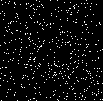

In [58]:
from PIL import Image
import numpy as np

def draw_positions(positions):
    array = np.zeros((W, H, 3), dtype=np.uint8)
    for y in range(H):
        for x in range(W):
            if (x, y) in [p["p"] for p in positions]:
                array[x, y] = [255, 255, 255]
            else:
                array[x, y] = [0, 0, 0]
    img = Image.fromarray(array)
    return img 

draw_positions(positions)

In [ ]:
for k in range(399, 1000):
    for position in positions: 
        x = (position["p"][0] + position["v"][0]) % W
        y = (position["p"][1] + position["v"][1]) % H

        position["p"] = (x, y)

    img = draw_positions(positions)  
    img.save(f"frames/frame_{k:03d}.png") 

In [ ]:
# Now we can use ffmpeg to create a video
# ffmpeg -r 10 -i frame_%03d.png -vcodec mpeg4 -y movie.mp4 


# 98, 199, 300, 401, 502, 603, 704, 805, 1007, 10501: (+101) H 
# 53, 156, 259,  568... 2113 4173 10353 (+103) W 

# For whatever reason



In [133]:
N = len(records)

positions = deepcopy(records)

interesting = []

for iteration in range(7572):
    for position in positions: 
        x = (position["p"][0] + position["v"][0]) % W
        y = (position["p"][1] + position["v"][1]) % H

        position["p"] = (x, y)

    # Detects the number of robots in each quadrant
    #count = count_robots_in_quadrants(positions)

    #for k in range(4):
    #    if count[k] < N/6: 
    #        print(iteration)
    #        interesting.append([iteration])
    #        img = draw_positions(positions)  
    #        img.save(f"interesting_frames/frame_{iteration:03d}.png") 
                



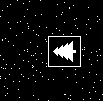

In [134]:
draw_positions(positions)

In [128]:
for k, positions in interesting:
    for position in positions: 
            x = (position["p"][0] + position["v"][0]) % W
            y = (position["p"][1] + position["v"][1]) % H

            position["p"] = (x, y)

    img = draw_positions(positions)  
    img.save(f"interesting_frames/frame_{k:03d}.png") 

In [ ]:
# NOTE: 
#
# I had an idea about reduction of entropy in the target, 
# but I did not know how to measure it. 
#
# 1. It may be worth figuring out a solution based on this? 

# 2. Convolution? 

# 3. Check the number of robots touching each other! 